# Spatial Coverage

In [1]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import fontManager
from collections import Counter

path = "../datasets.jsonl"
font_path = "../TaipeiSansTCBeta-Regular.ttf"

fontManager.addfont(font_path)
mpl.rc('font', family='Taipei Sans TC Beta')

o_dataset = []
with open(path, "r") as f: 
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) 
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_dataset.append(data)



## Spatial metadata information


In [2]:
time_field = ['temp_res','start_time','end_time','spatial','x_min','x_max','y_min','y_max','spatial_res']

spatial = [] # time and space info

for i in o_dataset:  # extract spatial metadata from the dataset
  temp = {key: None for key in time_field}
  for field in time_field:
    temp[field]=i[field] if i.get(field) is not None else ''  # sometimes fieid is not exist
  spatial.append(temp)
  


temp_res = [i['temp_res'] for i in spatial]  # time res
temp_res_count = Counter(temp_res)
new_temp_res_count = Counter({k if k != "" else "None": v for k, v in temp_res_count.items()})
print('時空解析度',new_temp_res_count)

start_time = [i['start_time'][:4] for i in spatial]  # start  year
start_time_count = Counter(start_time)
new_start_time_count = Counter({k if k != "" else "None": v for k, v in start_time_count.items()})
print('起始時間',new_start_time_count)

end_time = [i['end_time'][:4] for i in spatial]  # end year
end_time_count = Counter(end_time)
new_end_time_count = Counter({k if k != "" else "None": v for k, v in end_time_count.items()})
print('結束時間',new_end_time_count)

during = []      
for i in spatial:
  if i['start_time'] != '' and i['end_time'] != '':
    during.append(int(i['end_time'][:4])-int(i['start_time'][:4]))
during_time_count = Counter(during)
new_during_time_count = Counter({k if k != "" else "None": v for k, v in during_time_count.items()})
print('持續時間',new_during_time_count)

ss = []       #spatial pattern
for i in spatial:
  if i['spatial']:
    new = json.loads(i['spatial'])
    ss.append(new['type'])
new_ss = Counter(ss)
print('標記形狀',new_ss)

locations = []   # longtitude and latitude

for i in spatial:
  if i['x_min'] and i['x_max'] and i['y_min'] and i['y_max']:
    
    x_avr = (float(i['x_min']) + float(i['x_max']))/2   
    y_avr = (float(i['y_min']) + float(i['y_max']))/2
    locations.append((x_avr,y_avr))

print('經緯度',locations)

spatial_res = [i['spatial_res'] for i in spatial]   #time res
spatial_res_count = Counter(spatial_res)
new_spatial_res_count = Counter({k if k != "" else "None": v for k, v in spatial_res_count.items()})
print('時間解析度',new_spatial_res_count)

時空解析度 Counter({'None': 1390, 'yearly': 287, 'daily': 110, 'monthly': 63})
起始時間 Counter({'None': 1301, '2019': 69, '2022': 50, '2021': 45, '2020': 43, '2018': 35, '2023': 26, '2012': 25, '2013': 17, '2014': 14, '2010': 13, '2008': 12, '2015': 12, '2009': 11, '2000': 11, '1926': 11, '2017': 10, '2011': 10, '1945': 9, '1624': 7, '1976': 7, '2001': 6, '1875': 5, '1895': 5, '1665': 5, '2016': 4, '1960': 4, '1661': 4, '1870': 3, '1975': 3, '1783': 3, '1912': 3, '1979': 3, '1900': 3, '1662': 3, '2002': 2, '2007': 2, '1961': 2, '2004': 2, '1793': 2, '1871': 2, '1840': 2, '1897': 2, '1736': 2, '1626': 2, '1644': 2, '1623': 2, '1956': 1, '1860': 1, '2005': 1, '1981': 1, '2003': 1, '2006': 1, '1995': 1, '1967': 1, '1795': 1, '1877': 1, '1872': 1, '1874': 1, '1977': 1, '1980': 1, '1970': 1, '1932': 1, '1800': 1, '1723': 1, '1664': 1, '1654': 1, '1884': 1, '1935': 1, '1947': 1, '1974': 1, '1669': 1, '1782': 1, '1636': 1, '1652': 1, '1648': 1, '1640': 1, '1634': 1, '1629': 1, '1625': 1, '1999': 1})


## 時空解析度

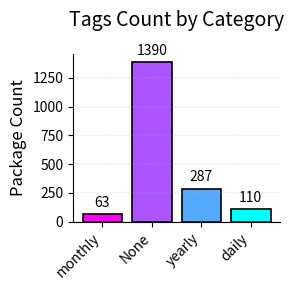

In [3]:

temp_res_key = [k for k,v in new_temp_res_count.items()]
temp_res_value = [v for k,v in new_temp_res_count.items()]

plt.figure(figsize=(3, 3))  
ax = plt.gca()
colors = plt.cm.cool(np.linspace(1, 0, len(temp_res_key)))
# Create the bar plot
bars = plt.bar(temp_res_key, temp_res_value, color=colors, edgecolor='black', linewidth=1.2)

# Add data labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)  # Adjust label position and fontsize
plt.ylabel('Package Count', fontsize=12)
plt.title('Tags Count by Category', fontsize=14, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(fontsize=10) 

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a grid for better readability
ax.yaxis.grid(True, linestyle='--', linewidth=0.3, alpha=0.7)

plt.tight_layout()
plt.show()

## Geographical distribution

In [4]:
import folium
print(locations)
new_loca = []
for i in locations:
    new_loca.append((i[1],i[0]))
map_center = (23.555,120.5)   # Choose any location as the map center
map_object = folium.Map(location=map_center, zoom_start=6)

for loc in new_loca[:100]:    # temporarily choose 100 points or lagging
    folium.Marker(loc).add_to(map_object)

# file for saving
# map_file = "map.html"
# map_object.save("map.html")

map_object



[(120.1211929356214, 23.0724101014631), (120.1793532408192, 23.241102258803373), (121.49660923518243, 22.65986434016208), (120.32544136047365, 23.962584501382935), (121.48986473679544, 22.658722390109922), (121.49197664111853, 22.657912566396437), (120.57218462519815, 23.453660960284935), (121.53613415000001, 25.047864795000002), (120.18928813981805, 23.06822593075041), (120.183684, 23.066885499999998), (120.17969226801145, 23.065644036570426), (120.20205974578857, 22.96536113586791), (119.43237304687501, 23.559686470788918), (119.43237304687501, 23.559686470788918), (119.43237304687501, 23.559686470788918), (121.58404826943298, 24.767627973040316), (121.67169574066068, 24.886534746880486), (120.77600017189981, 23.95594932888372), (120.40191650390626, 24.002463780734324), (120.31745910644533, 24.027093302918047), (121.48647308349611, 22.656785751263445), (121.48647308349611, 22.656785751263445), (121.487833, 22.6590965), (121.487833, 22.6590965), (120.5002103324755, 23.86181060833955),